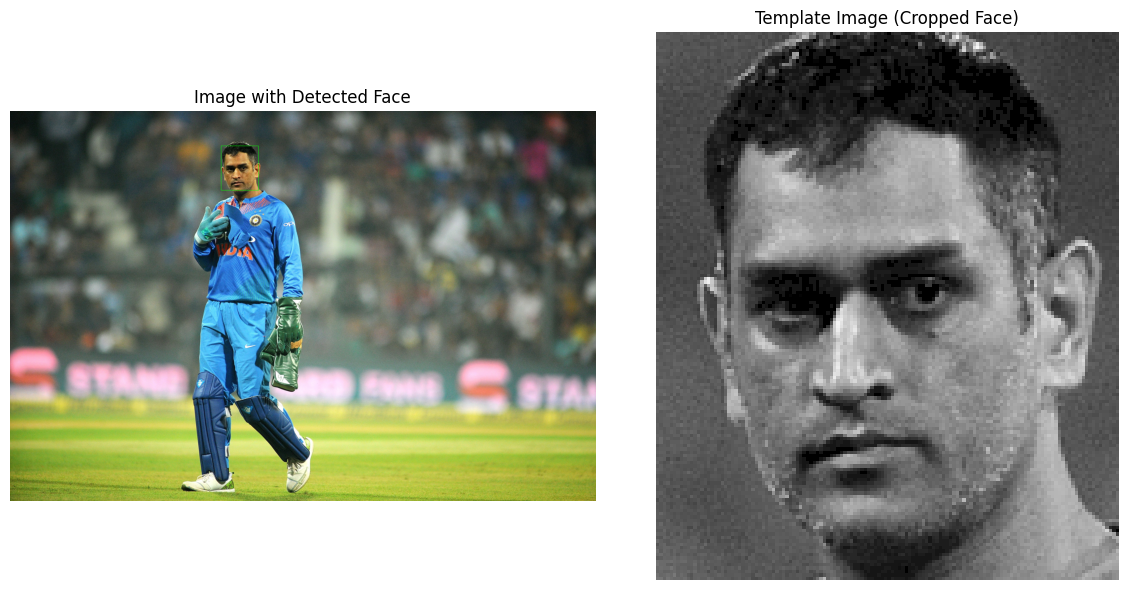

Best Match Score: 0.6221593618392944


In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the images
template = cv2.imread('dhoni.png', cv2.IMREAD_GRAYSCALE)  # Template: Cropped face of Dhoni
image = cv2.imread('dhoni_template.jpg', cv2.IMREAD_GRAYSCALE)  # Larger image: Dhoni playing cricket

# Step 2: Set a scale factor to try multiple template sizes
scale_factors = [0.5, 1.0, 1.5, 2.0]  # Experiment with these scale factors
best_match_val = -1  # Start with a low match value
best_top_left = (0, 0)
best_bottom_right = (0, 0)
best_h, best_w = template.shape

# Step 3: Loop through scaled versions of the template
for scale in scale_factors:
    resized_template = cv2.resize(template, None, fx=scale, fy=scale, interpolation=cv2.INTER_LINEAR)

    # Step 4: Perform template matching
    result = cv2.matchTemplate(image, resized_template, cv2.TM_CCOEFF_NORMED)

    # Step 5: Get the maximum match location
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

    # Step 6: Update best match if a better one is found
    if max_val > best_match_val:
        best_match_val = max_val
        best_top_left = max_loc
        best_h, best_w = resized_template.shape
        best_bottom_right = (best_top_left[0] + best_w, best_top_left[1] + best_h)

# Step 7: Draw the best matching rectangle on the original image
image_color = cv2.imread('dhoni_template.jpg')  # Reload original image in color for display
cv2.rectangle(image_color, best_top_left, best_bottom_right, (0, 255, 0), 2)  # Green rectangle

# Step 8: Display both the original image with the rectangle and the template side-by-side
# Convert to RGB for display with matplotlib (OpenCV uses BGR by default)
image_rgb = cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB)
template_rgb = cv2.cvtColor(template, cv2.COLOR_BGR2RGB)

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Show the original image with the rectangle (detected face area)
axes[0].imshow(image_rgb)
axes[0].set_title("Image with Detected Face")
axes[0].axis('off')  # Hide axes

# Show the template (cropped face image)
axes[1].imshow(template_rgb)
axes[1].set_title("Template Image (Cropped Face)")
axes[1].axis('off')  # Hide axes

# Display the images
plt.tight_layout()
plt.show()

# Optionally, print the best match score
print(f"Best Match Score: {best_match_val}")
